### Case Study 4 : Financial Delinquency

Submitted by:

- Ravi Sivaraman
- Balaji Avvaru
- Apurv Mittal

In [33]:
from scipy.io import arff
import pandas as pd
import numpy as np
import os
from os.path import isfile, join
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [34]:
# location of emails
data_path = "/Users/ravis/Library/CloudStorage/OneDrive-SouthernMethodistUniversity/Case Study 4/Data"

# get all data files
data_files = [f for f in os.listdir(os.getcwd()+'/Data') if os.path.isfile(join(os.getcwd()+'/Data', f))]

In [35]:
data_files

['2year.arff', '3year.arff', '5year.arff', '4year.arff', '1year.arff']

In [36]:
df = pd.DataFrame()

for f in data_files[1:]:
    data_temp = arff.loadarff(os.getcwd()+'/Data/'+f)
    temp_df = pd.DataFrame(data_temp[0])
    df = df.append(temp_df, ignore_index=True)


In [37]:
df.shape

(33232, 65)

In [38]:
df["Attr37"].describe()

count     18766.000000
mean        111.757396
std        3409.020758
min        -525.520000
25%           1.160925
50%           3.159200
75%          11.904500
max      398920.000000
Name: Attr37, dtype: float64

In [39]:
df["Attr60"].describe()

count    3.162300e+04
mean     4.702410e+02
std      3.631564e+04
min     -1.244000e+01
25%      5.499750e+00
50%      9.655400e+00
75%      1.969150e+01
max      4.818700e+06
Name: Attr60, dtype: float64

In [40]:
df["Attr45"].describe()

count     31626.000000
mean         12.356827
std        2693.362074
min     -256230.000000
25%           0.024740
50%           0.285185
75%           0.931390
max      366030.000000
Name: Attr45, dtype: float64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33232 entries, 0 to 33231
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Attr1   33225 non-null  float64
 1   Attr2   33225 non-null  float64
 2   Attr3   33225 non-null  float64
 3   Attr4   33120 non-null  float64
 4   Attr5   33167 non-null  float64
 5   Attr6   33225 non-null  float64
 6   Attr7   33225 non-null  float64
 7   Attr8   33156 non-null  float64
 8   Attr9   33227 non-null  float64
 9   Attr10  33225 non-null  float64
 10  Attr11  33189 non-null  float64
 11  Attr12  33120 non-null  float64
 12  Attr13  33168 non-null  float64
 13  Attr14  33225 non-null  float64
 14  Attr15  33208 non-null  float64
 15  Attr16  33156 non-null  float64
 16  Attr17  33156 non-null  float64
 17  Attr18  33225 non-null  float64
 18  Attr19  33168 non-null  float64
 19  Attr20  33168 non-null  float64
 20  Attr21  30542 non-null  float64
 21  Attr22  33225 non-null  float64
 22

In [42]:
# Validate null values in the csv file
df.isnull().sum().sum()

29165

In [43]:
pd.set_option('display.max_rows', 100)
# Validate null values in the csv file
print(df.isnull().sum())
# print columns with null values
missing_data_columns = df.columns[df.isnull().any()]
print("\n\nColumns with null values")
print("************************")
missing_data_columns

Attr1         7
Attr2         7
Attr3         7
Attr4       112
Attr5        65
Attr6         7
Attr7         7
Attr8        76
Attr9         5
Attr10        7
Attr11       43
Attr12      112
Attr13       64
Attr14        7
Attr15       24
Attr16       76
Attr17       76
Attr18        7
Attr19       64
Attr20       64
Attr21     2690
Attr22        7
Attr23       64
Attr24      697
Attr25        7
Attr26       76
Attr27     2058
Attr28      600
Attr29        7
Attr30       64
Attr31       64
Attr32      281
Attr33      112
Attr34       76
Attr35        7
Attr36        7
Attr37    14466
Attr38        7
Attr39       64
Attr40      112
Attr41      557
Attr42       64
Attr43       64
Attr44       64
Attr45     1606
Attr46      113
Attr47      223
Attr48        7
Attr49       64
Attr50       76
Attr51        7
Attr52      227
Attr53      600
Attr54      600
Attr55        0
Attr56       64
Attr57        5
Attr58       45
Attr59        5
Attr60     1609
Attr61       86
Attr62       64
Attr63  

Index(['Attr1', 'Attr2', 'Attr3', 'Attr4', 'Attr5', 'Attr6', 'Attr7', 'Attr8',
       'Attr9', 'Attr10', 'Attr11', 'Attr12', 'Attr13', 'Attr14', 'Attr15',
       'Attr16', 'Attr17', 'Attr18', 'Attr19', 'Attr20', 'Attr21', 'Attr22',
       'Attr23', 'Attr24', 'Attr25', 'Attr26', 'Attr27', 'Attr28', 'Attr29',
       'Attr30', 'Attr31', 'Attr32', 'Attr33', 'Attr34', 'Attr35', 'Attr36',
       'Attr37', 'Attr38', 'Attr39', 'Attr40', 'Attr41', 'Attr42', 'Attr43',
       'Attr44', 'Attr45', 'Attr46', 'Attr47', 'Attr48', 'Attr49', 'Attr50',
       'Attr51', 'Attr52', 'Attr53', 'Attr54', 'Attr56', 'Attr57', 'Attr58',
       'Attr59', 'Attr60', 'Attr61', 'Attr62', 'Attr63', 'Attr64'],
      dtype='object')

In [44]:
# percentage of missing values in each variable
(df[missing_data_columns].isnull().sum()/len(df)*100).sort_values(ascending=False)

Attr37    43.530332
Attr21     8.094608
Attr27     6.192826
Attr60     4.841719
Attr45     4.832691
Attr24     2.097376
Attr64     1.805489
Attr54     1.805489
Attr53     1.805489
Attr28     1.805489
Attr41     1.676095
Attr32     0.845571
Attr52     0.683077
Attr47     0.671040
Attr46     0.340034
Attr12     0.337025
Attr4      0.337025
Attr40     0.337025
Attr33     0.337025
Attr63     0.337025
Attr61     0.258787
Attr34     0.228695
Attr50     0.228695
Attr26     0.228695
Attr8      0.228695
Attr17     0.228695
Attr16     0.228695
Attr5      0.195595
Attr44     0.192585
Attr49     0.192585
Attr43     0.192585
Attr39     0.192585
Attr42     0.192585
Attr13     0.192585
Attr31     0.192585
Attr56     0.192585
Attr23     0.192585
Attr62     0.192585
Attr20     0.192585
Attr19     0.192585
Attr30     0.192585
Attr58     0.135412
Attr11     0.129393
Attr15     0.072220
Attr48     0.021064
Attr51     0.021064
Attr3      0.021064
Attr38     0.021064
Attr6      0.021064
Attr7      0.021064


In [45]:
df[missing_data_columns].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Attr1,33225.0,0.032737,3.366120,-4.638900e+02,0.004326,0.049720,0.126400,9.428000e+01
Attr2,33225.0,0.572838,5.584857,-4.308700e+02,0.266160,0.467270,0.682070,4.807300e+02
Attr3,33225.0,0.127770,5.028297,-4.797300e+02,0.024936,0.198870,0.404290,2.833600e+01
Attr4,33120.0,6.979986,336.469638,-4.031100e-01,1.056875,1.583150,2.802275,5.343300e+04
Attr5,33167.0,-458.943698,69855.222392,-1.190300e+07,-48.646000,-0.708360,50.327000,1.250100e+06
Attr6,33225.0,-0.039129,7.384356,-5.081200e+02,0.000000,0.000000,0.093298,5.432500e+02
Attr7,33225.0,0.084715,5.437653,-5.174800e+02,0.006738,0.059523,0.147240,4.537700e+02
Attr8,33156.0,13.489779,555.736905,-1.414100e+02,0.441645,1.089750,2.657825,5.343200e+04
Attr9,33227.0,2.586251,48.088931,-3.496000e+00,1.016300,1.175000,2.000500,3.876100e+03
Attr10,33225.0,0.713365,16.356262,-4.797300e+02,0.300520,0.510330,0.711080,1.099500e+03


#### Target

In [46]:
df['class'] = df['class'].replace([b'0', b'1'], [0, 1])

df['class'].value_counts()

0    31541
1     1691
Name: class, dtype: int64

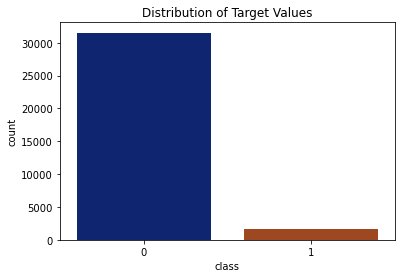

In [47]:
sns.countplot(x = "class", data = df)
plt.title("Distribution of Target Values")
plt.show()

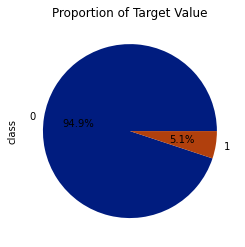

In [48]:
# Pie chart
df['class'].value_counts().plot.pie(autopct = "%.1f%%")
plt.title("Proportion of Target Value")
plt.show()

#### Drop columns with more missing

In [49]:
# drop Attr37 as it has around 43% missing data
#df=df.drop(["Attr37"], axis=1)

In [50]:
X = df.drop(['class'],axis=1)
ind_columns = df.drop('class',axis=1).columns
y = df['class']

In [51]:
#fill NA with mean() of each column in dataset
X = X.apply(lambda x: x.fillna(x.median()),axis=0)

In [52]:
# Validate null values in the csv file
X.isnull().sum().sum()

0

We did normalize the attributes using StandardScaler() to scale them between 0 and 1 before running models.

In [53]:
# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

We chose a stratified k-fold validation algorithm. In stratified k-fold cross-validation, the original sample is randomly partitioned into k equal size subsamples in which each fold contains roughly the same proportions of class labels. Of the k subsamples, a single subsample is retained as the validation data for testing the model, and the remaining k-1 subsamples are used as training data. The cross-validation process is then repeated k times (the folds), with each of the k subsamples used exactly once as the validation data. The k results from the folds can then be averaged (or otherwise combined) to produce a single estimation. The advantage of this method is that all observations are used for both training and validation, and each observation is used for validation exactly once.

The typical standard of 10 folds will be adequate for this dataset

In [54]:
#Create Cross Validation Procedure
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=10, random_state=1234, shuffle=True)

#### helper functions

In [55]:
# Model Metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
import time

def displayModel_metrics(best_model, grid_model, features, target, cv):   
    start = time.time()
    cv_results = cross_validate(best_model, features, target, cv=cv, scoring=['accuracy','precision','recall'], n_jobs=-1)
    elapsed_time = (time.time() - start) 
    print ('Fold Scores:')
    print(' ')
    print(cv_results['test_accuracy'])
    print(' ')
    print('Best Accuracy   :  {:.3f}'.format(grid_model.best_score_))
    print('Mean Accuracy   : ', cv_results['test_accuracy'].mean())
    print('Mean Precision  : ', cv_results['test_precision'].mean())
    print('Mean Recall     : ', cv_results['test_recall'].mean())
    print('Mean Fit Time   : ', cv_results['fit_time'].mean())
    print('Mean Score Time : ', cv_results['score_time'].mean())
    print('CV Time         : ', elapsed_time)
    return

# ROC curve plot
import seaborn as sns
from sklearn.preprocessing import label_binarize
from sklearn import metrics as mt

def roc_curve_plot(model_fit, features, target):

    sns.set_palette("dark")

    yhat_score = model_fit.predict_proba(features)

    # Compute ROC curve for a subset of interesting classes
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in np.unique(target):
        fpr[i], tpr[i], _ = mt.roc_curve(y, yhat_score[:, i], pos_label=i)
        roc_auc[i] = mt.auc(fpr[i], tpr[i])

    for i in np.unique(target):
        plt.plot(fpr[i], tpr[i], label= ('class %d (area = %0.2f)' % (i, roc_auc[i])))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

    plt.legend(loc="lower right")  
    plt.title('Receiver operating characteristic')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()    

#### Model 1: Random Forest with default parameters

In [56]:
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_scaled, y)

rf_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [57]:
y_hat = rf_clf.predict(X_scaled)
accuracy_score(y_hat, y)

0.9999398170438132

In [58]:
confusion_matrix(y, y_hat)

array([[31541,     0],
       [    2,  1689]])

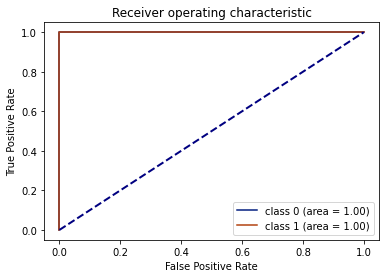

In [59]:
# ROC curve for Random Forest Classifier
roc_curve_plot(rf_clf, X_scaled, y)

/Users/ravis/miniforge3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Precision-Recall Curve')

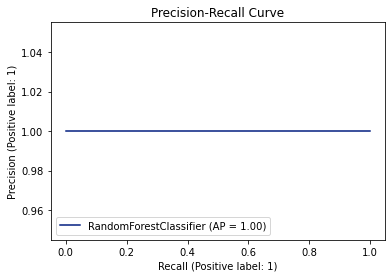

In [60]:
from sklearn.metrics import average_precision_score

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(rf_clf, X_scaled, y)
disp.ax_.set_title('Precision-Recall Curve')

In [61]:
# cross validation
cv_df = pd.DataFrame(cross_validate(rf_clf, X_scaled, y, cv=cv, scoring=['accuracy','precision','recall','f1'], n_jobs=-1))
cv_df

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
0,24.887916,0.041139,0.957882,0.763636,0.248521,0.375000
1,24.152535,0.043067,0.955475,0.739130,0.200000,0.314815
2,24.443414,0.048738,0.960277,0.893617,0.248521,0.388889
3,23.664988,0.038170,0.959976,0.821429,0.272189,0.408889
4,23.832521,0.060112,0.957869,0.822222,0.218935,0.345794
5,20.646766,0.046404,0.953355,0.652174,0.177515,0.279070
6,23.827968,0.068743,0.959976,0.860000,0.254438,0.392694
7,23.979762,0.043333,0.956666,0.719298,0.242604,0.362832
8,24.114483,0.046651,0.961481,0.815385,0.313609,0.452991
9,23.863917,0.069065,0.962383,0.833333,0.325444,0.468085


#### Model 2: Random Forest with GridSearch

Random forest is an ensemble tree-based learning algorithm where it combines more than one algorithms of same or different kind for classifying objects. The Random Forest Classifier is a set of decision trees from randomly selected subset of training set. It aggregates the votes from different decision trees to decide the final class of the test object.

GridSearch Parameters:

n_estimators: number of trees in the forest

max_depth: max number of levels in each decision tree

criterion: The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. Note: this parameter is tree-specific

min_samples_split = min number of data points placed in a node before the node is split

min_samples_leaf = min number of data points allowed in a leaf node

class_weight: The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y))

In [62]:

# define parameters       
max_depth_RF = [5, 7, 8, 10, 12]
random_state_RF = [1234]
n_estimators_RF =  [100]
criterion_RF = ['gini', 'entropy']
min_samples_leaf_RF = [1, 2]
min_samples_split_RF = [4, 6]
class_weight_RF = ['balanced']

# define grid search
param_grid_RF = dict(n_estimators=n_estimators_RF, max_depth=max_depth_RF, random_state=random_state_RF,
                     criterion=criterion_RF, min_samples_leaf=min_samples_leaf_RF,
                    min_samples_split=min_samples_split_RF, class_weight=class_weight_RF)

RF = RandomForestClassifier()

grid_search_RF = GridSearchCV(estimator=RF, param_grid=param_grid_RF, n_jobs=3, cv=cv, 
                               scoring='accuracy',error_score=0, verbose=1)

In [63]:
%%timeit
grid_result_RF = grid_search_RF.fit(X_scaled, y)
# summarize results
print("Best: %f using %s" % (grid_result_RF.best_score_, grid_result_RF.best_params_))
means = grid_result_RF.cv_results_['mean_test_score']
stds = grid_result_RF.cv_results_['std_test_score']
params = grid_result_RF.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 10 folds for each of 40 candidates, totalling 400 fits
Best: 0.953238 using {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 12, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 100, 'random_state': 1234}
0.800464 (0.005798) with: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 100, 'random_state': 1234}
0.799892 (0.005796) with: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 100, 'random_state': 1234}
0.800554 (0.005930) with: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 100, 'random_state': 1234}
0.799982 (0.006271) with: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 100, 'random_state': 1234}
0.864077 (0.004637) with: {'

Best: 0.953238 using {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 12, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 100, 'random_state': 1234}
0.800464 (0.005798) with: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 100, 'random_state': 1234}
0.799892 (0.005796) with: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 100, 'random_state': 1234}
0.800554 (0.005930) with: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 100, 'random_state': 1234}
0.799982 (0.006271) with: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 100, 'random_state': 1234}
0.864077 (0.004637) with: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 7,

Best: 0.953238 using {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 12, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 100, 'random_state': 1234}
0.800464 (0.005798) with: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 100, 'random_state': 1234}
0.799892 (0.005796) with: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 100, 'random_state': 1234}
0.800554 (0.005930) with: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 100, 'random_state': 1234}
0.799982 (0.006271) with: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 100, 'random_state': 1234}
0.864077 (0.004637) with: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 7,

Best: 0.953238 using {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 12, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 100, 'random_state': 1234}
0.800464 (0.005798) with: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 100, 'random_state': 1234}
0.799892 (0.005796) with: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 100, 'random_state': 1234}
0.800554 (0.005930) with: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 100, 'random_state': 1234}
0.799982 (0.006271) with: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 100, 'random_state': 1234}
0.864077 (0.004637) with: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 7,

In [65]:
grid_result_RF

NameError: name 'grid_result_RF' is not defined

In [64]:
# # The GridSearch algorithm determined the following optimal parameters
best_Estimator_RF =grid_result_RF.best_estimator_
Coef_weights_RF = grid_result_RF.best_estimator_.feature_importances_
best_Estimator_RF

NameError: name 'grid_result_RF' is not defined

In [ ]:
# Display model metrics
displayModel_metrics(best_Estimator_RF, grid_result_RF, X_scaled, y, cv)

In [ ]:
# ROC curve for Random Forest Classifier
roc_curve_plot(grid_result_RF, X_scaled, y)

In [ ]:
disp = plot_precision_recall_curve(best_Estimator_RF, X_scaled, y)
disp.ax_.set_title('Precision-Recall Curve')

#### Feature Importance

In [ ]:
# Important features with their weights 
imp_feature_df = pd.DataFrame({'feature_names':ind_columns, 
                               'Coef_weights':Coef_weights_RF})
imp_feature_df.sort_values(by='Coef_weights', inplace=True, ascending=False )

imp_feature_df

In [ ]:
# Visulization of important features 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ax = sns.barplot(x ='Coef_weights', y = 'feature_names',data=imp_feature_df.head(10), orient= 'h')
ax.set_title("Random Forest Feature Importance")
ax.set_xlabel("Coefficient Magnitude\n(z-score)")
ax.set_ylabel("Feature Names")